<a href="https://colab.research.google.com/github/hanupratap/Stock-Market-Prediction-Hybrid-Models/blob/main/LSTM_Improved_modelipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [5]:
START = "2010-01-01"
TODAY = dt.date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [7]:
data = load_data('^GSPC')
vix = load_data('^VIX')
df=data.merge(vix, on='Date')
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-7-4e73cb00e3d5>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=data.merge(vix, on='Date')


Price,Date,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^VIX,^VIX,^VIX,^VIX,^VIX
0,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,20.040001,21.680000,20.030001,21.680000,0
1,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,19.350000,20.129999,19.340000,20.049999,0
2,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,19.160000,19.680000,18.770000,19.590000,0
3,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,19.059999,19.709999,18.700001,19.680000,0
4,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,18.129999,19.270000,18.110001,19.270000,0


Visualizing Closing Price

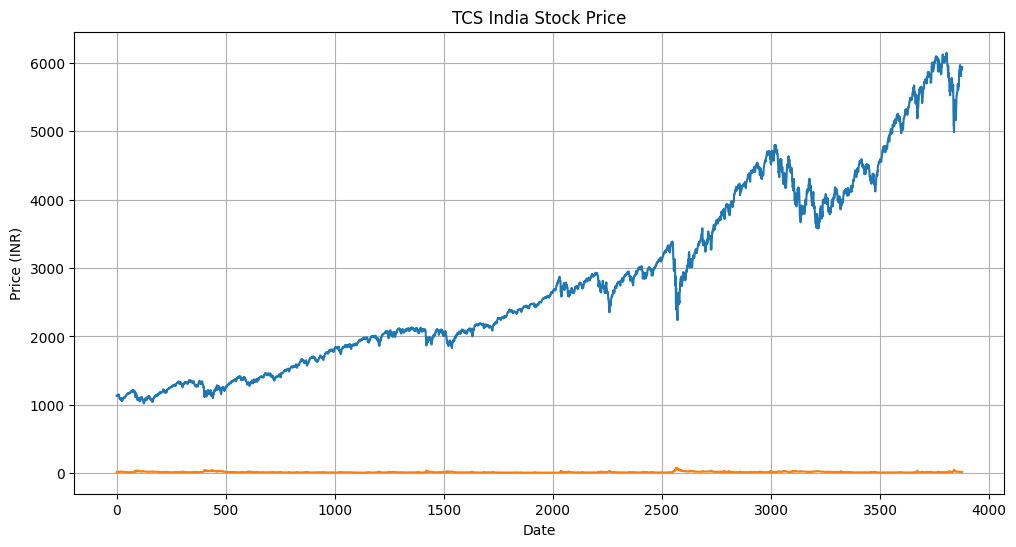

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

Price,Date,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^VIX,^VIX,^VIX,^VIX,^VIX
0,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,20.040001,21.680000,20.030001,21.680000,0
1,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,19.350000,20.129999,19.340000,20.049999,0
2,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,19.160000,19.680000,18.770000,19.590000,0
3,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,19.059999,19.709999,18.700001,19.680000,0
4,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,18.129999,19.270000,18.110001,19.270000,0
...,...,...,...,...,...,...,...,...,...,...,...
3872,2025-05-27,5921.540039,5924.330078,5854.069824,5854.069824,5366380000,18.959999,21.010000,18.950001,20.629999,0
3873,2025-05-28,5888.549805,5939.919922,5881.879883,5925.540039,4665050000,19.309999,19.430000,18.680000,19.209999,0
3874,2025-05-29,5912.169922,5943.129883,5873.799805,5939.959961,4569750000,19.180000,20.200001,18.110001,18.250000,0


# Plotting moving averages of 100 day

---



In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,^GSPC,^VIX
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
3872,5766.470098,21.7876
3873,5766.539297,21.8072
3874,5766.975498,21.8197
3875,5766.667695,21.8441


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

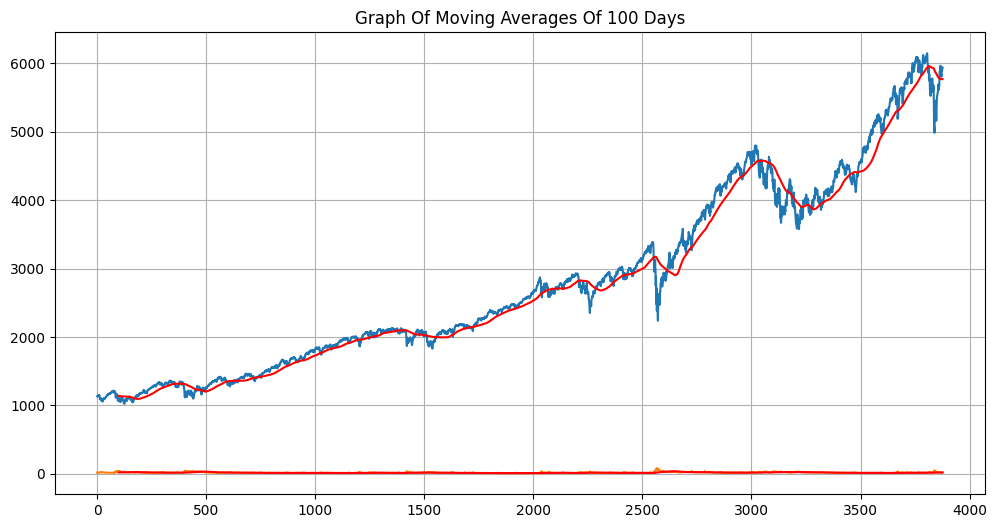

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,^GSPC,^VIX
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
3872,5776.714792,19.60130
3873,5779.560991,19.57890
3874,5782.401040,19.57295
3875,5785.237539,19.56225


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

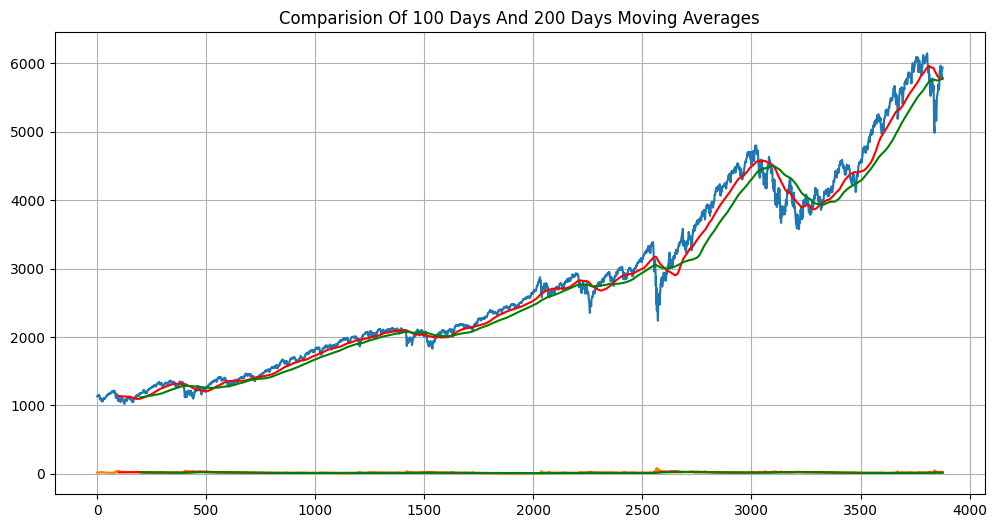

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
df.shape

(3877, 11)

# Spliting the dataset into training (70%) and testing (30%) set

In [17]:
# Splitting data into training and testing

train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(2713, 11)
(1164, 11)


In [19]:
train.head()

Price,Date,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^VIX,^VIX,^VIX,^VIX,^VIX
0,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,20.040001,21.680000,20.030001,21.680000,0
1,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,19.350000,20.129999,19.340000,20.049999,0
2,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,19.160000,19.680000,18.770000,19.590000,0
3,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,19.059999,19.709999,18.700001,19.680000,0
4,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,18.129999,19.270000,18.110001,19.270000,0


In [20]:
test.head()

Price,Date,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^VIX,^VIX,^VIX,^VIX,^VIX
2713,2020-10-13,3511.929932,3534.010010,3500.860107,3534.010010,3611100000,26.070000,26.930000,25.160000,25.670000,0
2714,2020-10-14,3488.669922,3527.939941,3480.550049,3515.469971,3858510000,26.400000,27.230000,25.530001,25.719999,0
2715,2020-10-15,3483.340088,3489.080078,3440.889893,3453.719971,3724550000,26.969999,29.059999,26.820000,27.100000,0
2716,2020-10-16,3483.810059,3515.760010,3480.449951,3493.500000,4688030000,27.410000,27.459999,26.190001,27.160000,0
2717,2020-10-19,3426.919922,3502.419922,3419.929932,3493.659912,4091080000,29.180000,29.690001,27.040001,27.360001,0


# Using MinMax scaler for normalization of the dataset

---



In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [23]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0350441 ],
       [0.04138994],
       [0.04259208],
       ...,
       [0.9485789 ],
       [0.95858638],
       [0.97449047]])

In [27]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(2613, 100, 1)

# ML Model (LSTM)

---



In [29]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 282ms/step - loss: 0.0708 - mean_absolute_error: 0.1903
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - loss: 0.0074 - mean_absolute_error: 0.0604
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - loss: 0.0064 - mean_absolute_error: 0.0554
Epoch 4/100


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1164, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
past_100_days

,0
0,2969.949951
1,2948.050049
2,3004.080078
3,3015.649902
4,3046.610107
...,...
95,3408.739990
96,3384.560059
97,3434.280029
98,3459.669922


In [ ]:
final_df = pd.concat([past_100_days,test_df])

In [ ]:
final_df

,0
0,2969.949951
1,2948.050049
2,3004.080078
3,3015.649902
4,3046.610107
...,...
1159,5854.069824
1160,5925.540039
1161,5939.959961
1162,5903.669922


In [ ]:
final_df.head()

,0
0,2969.949951
1,2948.050049
2,3004.080078
3,3015.649902
4,3046.610107


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00687282],
       [0.        ],
       [0.01758384],
       ...,
       [0.93894772],
       [0.92755886],
       [0.92536527]])

In [ ]:
input_data.shape

(1264, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1164, 100, 1)
(1164,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


In [ ]:
y_pred.shape

(1164, 1)

In [ ]:
y_test

array([0.18389115, 0.17807276, 0.15869382, ..., 0.93894772, 0.92755886,
       0.92536527])

In [ ]:
y_pred

array([[0.24058728],
       [0.2440538 ],
       [0.24808185],
       ...,
       [0.888319  ],
       [0.88380504],
       [0.8811498 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00031383])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

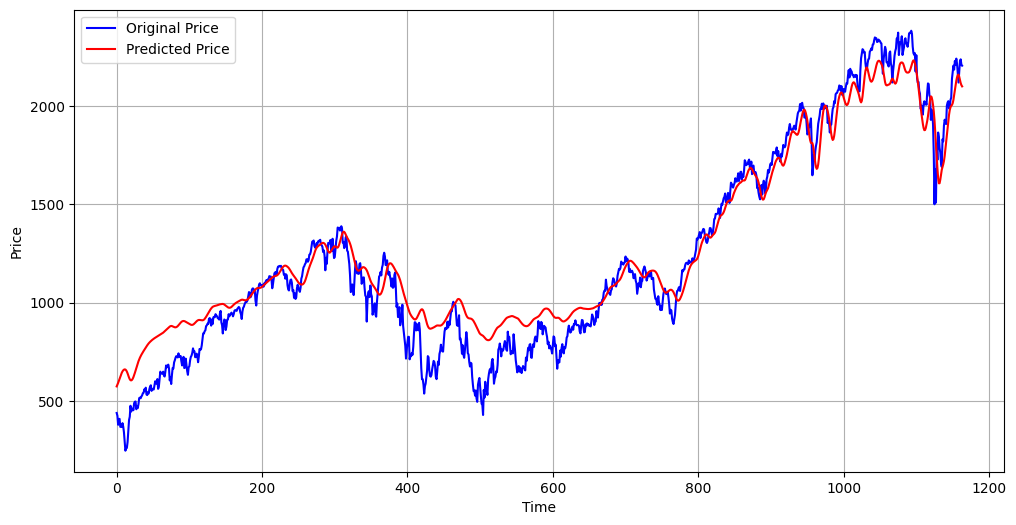

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.42%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9382156681112312


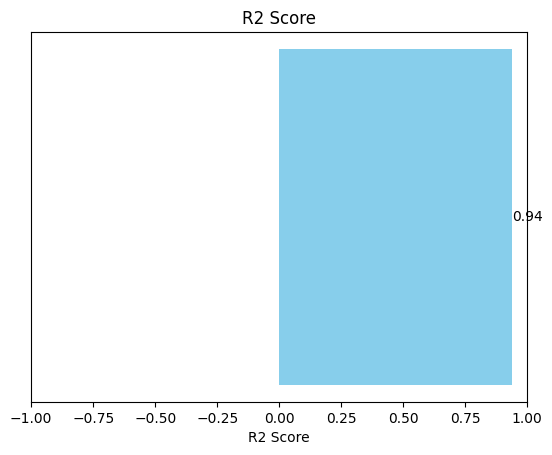

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

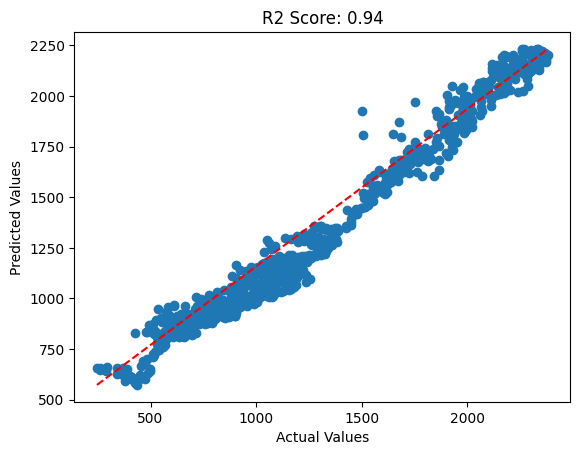

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()